# Assignment 3 

Hengcheng Zhang

u7096187

## 1. Rocket Science

(a)

Let $x_1$ denotes the units of solid fuel, $x_2$ denotes the unit of liquid oxygen.

$\begin{aligned} \text{minimize } &\frac{1}{2}x^TPx + q^Tx + r\\
\text{subject to } &2x_1 + x_2 \leq 500 &\text{weight}\\
&-x_1 \leq -30 &\text{ignite}\\
&2x_1 - x_2 \leq 0 &\text{efficiency}\\
&-7x_1 + x_2 \leq 0 &\text{safe opreation}\\
&-x_1 \leq 0 &\text{real world unit}\\
&-x_2 \leq 0 &\text{real world unit}\\
\end{aligned}$

(b)

Since we need to maximize the tolarence towards error, we want to find the Chebyshev centre of the polydron form by the constraints.

We can then rewtire the constraints in the form of $Ax \preceq b$ where $A = \begin{bmatrix} 2 & 1\\ -1 & 0\\ 2 & -1\\ -7 & 1\\ -1 &0\\ 0 & -1\end{bmatrix}$ and $b = \begin{bmatrix} 500\\ -30\\ 0\\ 0\\ 0\\ 0\end{bmatrix}$.

Then we can find the centre of ball $x_c$ and radius $r$ by solving 
$\begin{aligned} &\text{maximize } r\\
&\text{subject to } a_i^Tx_c + r \|a_i\|_2 \leq b_i, i = 1, \cdots, 6
\end{aligned}$

which is equivalent to
$\begin{aligned} \text{maximize } &r\\
\text{subject to } & 2x_1 + x_2 + \sqrt{5}r \leq 500\\
& -x_1 + r \leq -30\\
& 2x_1 - x_2 + \sqrt{5}r \leq 0\\
& -7x_1 + x_2 + 5\sqrt{2}r \leq 0\\
& -x_1 +r \leq 0\\
& -x_2 + r \leq 0\\
\end{aligned}$


(c)

Since all the contraints are forms a polyhedron, they are all convex.

$\therefore$ This problem is convex. 

In [119]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$x_2$')

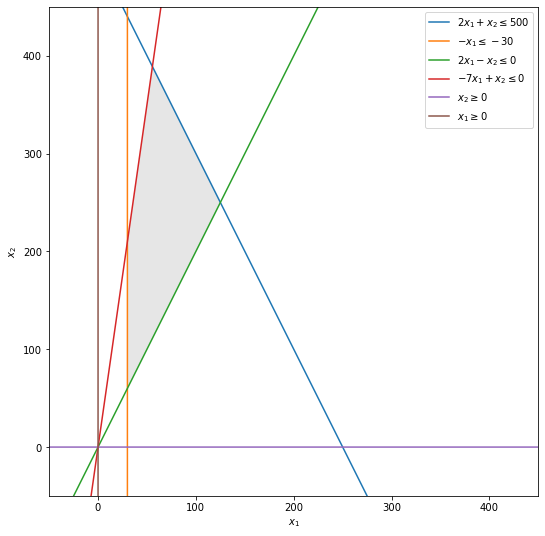

In [120]:
plt.figure(figsize=[13,9])
lower_bound = -50
upper_bound = 450
mesh_count = (upper_bound-lower_bound) * 5
d = np.linspace(lower_bound,upper_bound,mesh_count)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*x+y<=500) & (-x<=-30) & (2*x-y<=0) & (-7*x+y<=0) & (-x<=0) & (-y<=0)).astype(int), 
            alpha = 0.1, cmap='Greys', origin="lower", extent=(lower_bound,upper_bound,lower_bound,upper_bound))
x = np.linspace(lower_bound, upper_bound, mesh_count)
y1 = -2*x + 500
y3 = 2*x
y4 = 7*x
plt.plot(x, y1, label='$2x_1 + x_2 \leq 500$')
plt.plot(30*np.ones(mesh_count), x, label='$-x_1 \leq -30$')
plt.plot(x, y3, label='$2x_1 - x_2 \leq 0$')
plt.plot(x, y4, label='$-7x_1 + x_2 \leq 0 $')
plt.plot(x, np.zeros(mesh_count),label='$x_2 \geq 0$')
plt.plot(np.zeros(mesh_count),x,label='$x_1 \geq 0$')
plt.xlim(lower_bound,upper_bound)
plt.ylim(lower_bound,upper_bound)
plt.legend(loc = 'best')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

(d)

The good solution is around $x = (80, 250)$ because it is the centre of the largest inscribed circle in the polyhedron.

## 2. Optimality

(a)

Since $x$ is optimal iff it is feasible and 
$\nabla f_0(x)^T(y-x) \geq 0
$

$\begin{aligned} \nabla f_0(x) &= Px + q\\
&= \begin{bmatrix} 26 & 24 & -4\\ 24 & 34 & 12\\ -4 & 12 & 24 \end{bmatrix} \cdot \begin{bmatrix} 1 & 0.5 & -1 \end{bmatrix}^T + \begin{bmatrix} -44 & -29 & 26 \end{bmatrix}^T\\
&= \begin{bmatrix} -2 & 0 & 4 \end{bmatrix}^T
\end{aligned}$

$\begin{aligned}
\nabla f_0(x)^T(y-x) &= \begin{bmatrix} -2 & 0 & 4 \end{bmatrix} \cdot \begin{bmatrix} y_1 - 1\\ y_2 - \frac{1}{2}\\ y_3 + 1 \end{bmatrix}\\
&= -2y_1 +4y_3 +6
\end{aligned}$

Since $y_1$ and $y_3 \in [-1,1]$

$\therefore -2y_1 + 4y_3 \in [-6, 6]$

$\therefore \nabla f_0(x)^T(y-x) = -2y_1 +4y_3 +6 \geq 0$

$\therefore x^* = \begin{bmatrix} 1 & \frac{1}{2} & -1 \end{bmatrix}$ is optimal.

(b)

For $x_1, x_2, x_3$,

$f(x_1) \in [-2, 0],$

$f(x_2) \in [-1.5, 0.5]$

$f(x_3) \in [0, 2]$

For all $x_1, x_2, x_3$, no $f(x_i) $ is strictly equal to zero,

$\therefore$ no constraints is active.

## 3. Simple Linear Programs

(a)

If $Ax=b$ has no solution for $x$, then this LP is infeasible and thus $p^* = \infty$,

<!-- there will be no constraints and this LP have no solution, -->

otherwise we can construct the Lagrangian where 
$\begin{aligned} \mathcal{L}(x,\nu) &= c^Tx + \nu^T(Ax-b)\\
\nabla_x \mathcal{L}(\nu) &= c + A^T \nu = 0\\
\therefore c &= -A^T \nu\\
\end{aligned}$

$\therefore$ When $-A^T\nu = c$ has no solution, there will be no valid $\nu$ and therefore the LP will also have no solution,

otherwise if we substitute $-A^T\nu = c$ into the Lagrangian, 

We can get $\mathcal{L}(\nu) = p^* = \nu^Tb $ when $\nu$ satisfies $-A^T\nu=c$,

Therefore this LP has no solution when $-A^T\nu=c$ has no solution for $\nu$ has $p^* = \infty$ for $Ax=b$ has no solution for $x$, otherwise the solution is $ \{ x \mid Ax = b \} $.

(b)

For $c_i > 0$, we choose the corresponding $x_i$ to be $l$ since we want to minimize each $c_ix_i$,

For $c_i < 0$, we can choose $x_i = u$ to minimize $c_ix_i$,

For $c_i = 0$, we can choose arbitrary $\{ x_i \mid l \leq x_i \leq u \}$.

(c)

Let $c_{[i]}$ denote the $i^{th}$ smallest element in c,

If we assume there are $n$ smallest values in $c$, in other words there are n $c_{[1]}$ s, 

Then $p^* = \sum_{i=1}^n \frac{1}{n} c_{[1]} = c_{[1]}$ with all the corresponding $x_i = \frac{1}{n}$ and other $x_j = 0$.

If we change the constraints to $1^Tx \leq 1$, $p^* = 0$ with all $x_i = 0$ if $c \succeq 0$,

If $c \succeq 0$ doesn't hold, then $p^* = \sum_{i=1}^n \frac{1}{n} c_{[1]} = c_{[1]}$ which is the same as $1^Tx = 1$. 

## 4. Linear Program with $n$ Constraints

The Lagrangian is $\mathcal{L}(x,\lambda) = c^Tx + d + \lambda (Ax-b)$,

$\therefore \nabla_x \mathcal{L}(\lambda) = c + A^T\lambda = 0$,

$\begin{aligned}\therefore A^T\lambda &= -c\\
\lambda &= -A^{-T}c \succeq 0\\
\therefore A^{-T}c &\preceq 0\\
\end{aligned}$

$\therefore g(\lambda) = -\lambda^T A x + d + \lambda^T A x - \lambda^Tb = d - \lambda^T b = c^T A^{-1} b + d$ which is not related to $\lambda$ or $x$,

Thus $p^* = g(\lambda) = c^T A^{-1} b + d$ when $A^{-T}c \preceq 0$ and when $A^{-T}c \succ 0$, there is no such $\lambda$ and $p^* = -\infty$,

$\therefore p^* = \begin{cases} c^T A^{-1} b + d &\text{ when } A^{-T}c \preceq 0\\
-\infty &\text{otherwise}
\end{cases}$

## 5. Analytic Centering

(a)

The domain is $\{ x \mid a_i^Tx < b_i \text{ for } i = 1, \cdots, n\}$

(b)

The problem will become,
$\begin{aligned} \text{minimize } &-\sum_{i=1}^m \log{y_i}, \text{ for } i = 1,\cdots,m\\
\text{subject to } & y = b - Ax\\
\end{aligned}$

where $y = \begin{bmatrix}y_1\\ \vdots \\ y_m \end{bmatrix}, b = \begin{bmatrix}b_1\\ \vdots \\ b_m \end{bmatrix}, A = \begin{bmatrix}a_1^T\\ \vdots \\ a_m^T \end{bmatrix}$

(c)

$\mathcal{L}(x,\nu) = -\sum_{i=1}^m\log{y_i} + \nu^T (y+Ax-b)$

To find the x that minimize $\mathcal{L}(x,\nu)$, we can take the first derivative and set it to 0,

$\nabla_{x_i}\mathcal{L}(x,\nu) = -\left( \sum_{j \neq i}^m \frac{1}{y_j} \cdot 0 + \frac{a_i}{y_i} \right) + a_i^T\nu_i = 0$

$\therefore \text{The }y_i = \frac{a_i}{a_i^T\nu_i} \text{ minimizes } \nabla_{x_i}\mathcal{L}(x,\nu) \text{ where }\nu_i \neq 0$

$\begin{aligned}\therefore g(\nu) &= \sum_{i = 1}^m \log{\frac{a_i^T\nu_i}{a_i}} + \begin{bmatrix}\nu_1 & \cdots & \nu_m \end{bmatrix} \left( \begin{bmatrix}y_1\\ \vdots \\ y_m\end{bmatrix}+Ax-\begin{bmatrix}b_1\\ \vdots \\ b_m \end{bmatrix} \right)\\
&= \sum_{i = 1}^m \log{\nu_i} + \sum_{i=1}^m \nu_i y_i - \nu^T b + \nu^TAx\\
&= \sum_{i = 1}^m \log{\nu_i} + m - \nu^T b + \nu^TAx
\end{aligned}$

$\therefore g(\nu)$ is valid iff $\nu^TA = 0$, otherwise we can't find a minimised function over $\nabla\mathcal{L}(x,\nu)$ and therefore $g(\nu) = -\infty$

$\therefore$ The dual function is $g(\nu) = \begin{cases} \sum_{i = 1}^m \log{\nu_i} + m - \nu^T b & \text{, when } \nu^TA = 0 \text{ and } \nu \succ 0 \\ -\infty & \text{, otherwise}\end{cases}$

(d)

Therefore the dual problem will be 

$\begin{aligned}\text{maximize } & \sum_{i = 1}^m \log{\nu_i} + m - \nu^T b\\
\text{subject to } & \nu^TA = 0\\
& \nu \succ 0
\end{aligned}$

## 6. Supporting hyperplane interpretation of the KKT conditions

Since $f_i$ are convex, let $x^*$ denotes the global optimal point,

There is $f_i(y) \geq f_i(x) + \nabla f_i(x)^T (y-x)$,

<!-- Since $x^*$ is global optima, there is $\nabla f_i(x^*)^T(y-x^*) \geq 0$ -->
From the constraints we have $f_i(x) \leq 0$,

$\begin{aligned} \therefore f_i(y) &\geq f_i(x) + \nabla f_i(x)^T (y-x)\\
0 &\geq f_i(x) + \nabla f_i(x)^T (y-x)\\
f_i(x^*) + \nabla f_i(x^*)^T (x-x^*) &\leq 0\\
\end{aligned}$

Since for each $i = 1, \cdots, m$ there is $\lambda_i^* \geq 0$ and $f_i(x^*) + \nabla f_i(x^*)^T (x-x^*) \leq 0$,

Thus we can deduce that $\sum_{i = 1}^m \lambda_i^* \left( f_i(x^*) + \nabla f_i(x^*)^T (x-x^*) \right) \leq 0$,

$\therefore \sum_{i = 1}^m \lambda_i^* f_i(x^*) + \sum_{i = 1}^m \lambda_i^* \nabla f_i(x^*)^T (x-x^*) \leq 0$,

Since under KKT conditions $\lambda_i^* f_i(x^*) = 0$,

$\therefore \left( \sum_{i = 1}^m \lambda_i^* \nabla f_i(x^*)^T \right) (x-x^*) \leq 0$,

Since there also has $\nabla f_0(x^*) + \sum_{i = 1}^m \lambda_i^* \nabla f_i(x^*) = 0$,

$\therefore -f_0(x^*)^T(x-x^*) \leq 0$,

$\therefore f_0(x^*)^T(x-x^*) \geq 0$